In [1]:
import pandas as pd
import numpy as np

data = 'https://github.com/JadenFaste/WCECPlotly/blob/main/Test%20data.csv'
df = pd.read_csv(data)

# indoor air temperature: : T_Thermostat_F  


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3911185005.py:7: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3911185005.py:19: FutureWarning: The provided callable <function min at 0x0000015AF7843100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  cycle_durations = data.groupby(['Controller_AC_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3911185005.py:19: FutureWarning: The provided callable <function max at 0x0000015AF7842FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cycle_durations = data.groupby(['Controller_AC_Mode', 'cycle_start

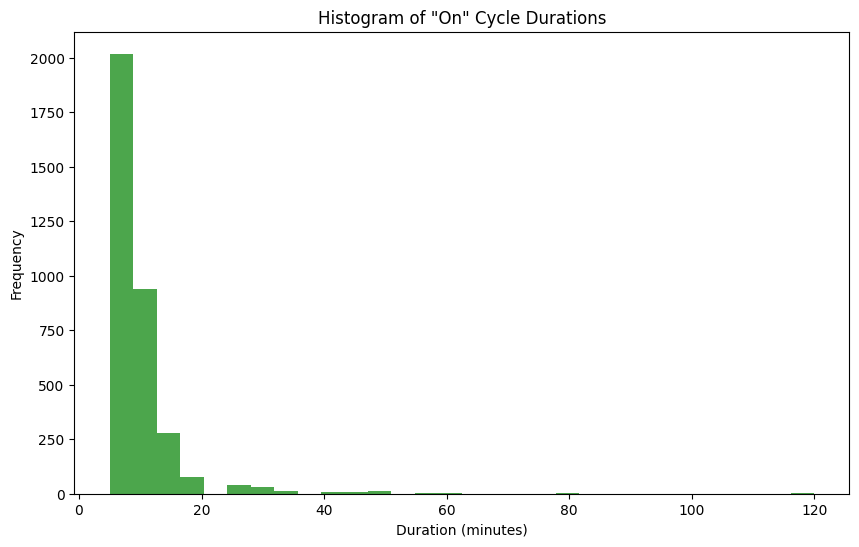

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'https://raw.githubusercontent.com/JadenFaste/WCECPlotly/main/Test%20data.csv'  
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Detect changes in 'Controller_AC_Mode' to identify cycle changes
data['change'] = data['Controller_AC_Mode'].diff().ne(0)

# Mark the start of each cycle
data['cycle_start'] = data['change'].cumsum()

# Group by cycle and calculate the start and end times
cycle_durations = data.groupby(['Controller_AC_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
cycle_durations['duration'] = (cycle_durations['max'] - cycle_durations['min']).dt.total_seconds() / 60  # Convert to minutes

# Filter out the zero duration cycles and select only 'on' cycles
cycle_durations = cycle_durations[cycle_durations['duration'] > 0]
on_durations = cycle_durations.query("Controller_AC_Mode == 1")['duration']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(on_durations, bins=30, color='green', alpha=0.7)
plt.title('Histogram of "On" Cycle Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [12]:
import numpy as np

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Detect changes in 'Controller_AC_Mode'
data['change'] = data['Controller_Water_Heating_Mode'].diff().ne(0)

# Identify the start of each cycle
data['cycle_start'] = data['change'].cumsum()

# Group by each cycle and calculate durations
cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
cycle_durations['duration'] = (cycle_durations['max'] - cycle_durations['min']).dt.total_seconds() / 60  # Convert to minutes

# Filter out the zero duration cycles (transitions)
cycle_durations = cycle_durations[cycle_durations['duration'] > 0]

# Print start and end times of each cycle
print("Cycle Start and End Times:")
for (mode, cycle), row in cycle_durations.iterrows():
    cycle_type = "On" if mode == 1 else "Off"
    print(f"{cycle_type} Cycle {cycle}: Start = {row['min']}, End = {row['max']}")

# Create separate dataframes for on and off durations
on_durations = cycle_durations.query("Controller_Water_Heating_Mode  == 1")['duration']
off_durations = cycle_durations.query("Controller_Water_Heating_Mode  == 0")['duration']


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3029000223.py:13: FutureWarning: The provided callable <function min at 0x0000015AF7843100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3029000223.py:13: FutureWarning: The provided callable <function max at 0x0000015AF7842FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])


Cycle Start and End Times:
Off Cycle 1: Start = 2022-05-21 00:00:00, End = 2022-05-21 08:00:00
Off Cycle 3: Start = 2022-05-21 08:20:00, End = 2022-05-21 10:25:00
Off Cycle 5: Start = 2022-05-21 10:55:00, End = 2022-05-21 12:20:00
Off Cycle 7: Start = 2022-05-21 12:40:00, End = 2022-05-21 20:15:00
Off Cycle 9: Start = 2022-05-21 20:35:00, End = 2022-05-21 21:25:00
Off Cycle 11: Start = 2022-05-21 21:55:00, End = 2022-05-22 10:30:00
Off Cycle 13: Start = 2022-05-22 10:55:00, End = 2022-05-22 15:30:00
Off Cycle 15: Start = 2022-05-22 15:50:00, End = 2022-05-22 17:10:00
Off Cycle 17: Start = 2022-05-22 17:30:00, End = 2022-05-22 17:50:00
Off Cycle 19: Start = 2022-05-22 18:10:00, End = 2022-05-22 19:00:00
Off Cycle 23: Start = 2022-05-22 19:20:00, End = 2022-05-22 19:40:00
Off Cycle 25: Start = 2022-05-22 20:05:00, End = 2022-05-23 05:20:00
Off Cycle 27: Start = 2022-05-23 05:45:00, End = 2022-05-23 10:40:00
Off Cycle 29: Start = 2022-05-23 11:00:00, End = 2022-05-23 19:10:00
Off Cycle 31

In [20]:
import numpy as np
import pandas as pd

file_path = 'https://raw.githubusercontent.com/JadenFaste/WCECPlotly/main/Test%20data.csv'  
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Detect changes in 'Controller_Water_Heating_Mode'
data['change'] = data['Controller_Water_Heating_Mode'].diff().ne(0)

# Identify the start of each cycle
data['cycle_start'] = data['change'].cumsum()

# Group by each cycle and calculate durations
cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
cycle_durations['duration'] = (cycle_durations['max'] - cycle_durations['min']).dt.total_seconds() / 60  # Convert to minutes

# Filter out the zero duration cycles (transitions)
cycle_durations = cycle_durations[cycle_durations['duration'] > 0]

# Create separate dataframes for on and off durations
on_durations = cycle_durations.query("Controller_Water_Heating_Mode == 1")['duration']
off_durations = cycle_durations.query("Controller_Water_Heating_Mode == 0")['duration']

# Calculate the lower set point
data['Lower_Set_Point'] = data['T_HeatSetpoint_F'] - 0.5

# Filter data to include only periods when Controller_Water_Heating_Mode is on
on_cycles_data = data[data['Controller_Water_Heating_Mode'] == 1]

# Count the number of times T_thermostat_F is below the lower set point during on cycles
below_lower_set_point_count_on_cycles = (on_cycles_data['T_Thermostat_F'] < on_cycles_data['Lower_Set_Point']).sum()

# Print the count
print(f"Number of times T_thermostat_F is below the lower set point during 'on' cycles: {below_lower_set_point_count_on_cycles}")


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3470284506.py:5: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of times T_thermostat_F is below the lower set point during 'on' cycles: 2304


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3470284506.py:17: FutureWarning: The provided callable <function min at 0x0000015AF7843100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
C:\Users\bober\AppData\Local\Temp\ipykernel_9584\3470284506.py:17: FutureWarning: The provided callable <function max at 0x0000015AF7842FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])


In [24]:
import numpy as np
import pandas as pd

file_path = 'https://raw.githubusercontent.com/JadenFaste/WCECPlotly/main/Test%20data.csv'  
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Detect changes in 'Controller_Water_Heating_Mode'
data['change'] = data['Controller_Water_Heating_Mode'].diff().ne(0)

# Identify the start of each cycle
data['cycle_start'] = data['change'].cumsum()

# Group by each cycle and calculate durations
cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
cycle_durations['duration'] = (cycle_durations['max'] - cycle_durations['min']).dt.total_seconds() / 60  # Convert to minutes

# Filter out the zero duration cycles (transitions)
cycle_durations = cycle_durations[cycle_durations['duration'] > 0]

# Create separate dataframes for on and off durations
on_durations = cycle_durations.query("Controller_Water_Heating_Mode == 1")['duration']
off_durations = cycle_durations.query("Controller_Water_Heating_Mode == 0")['duration']

# Calculate the lower set point
data['Lower_Set_Point'] = data['T_HeatSetpoint_F'] - 0.5

# Filter data to include only periods when Controller_Water_Heating_Mode is on
on_cycles_data = data[data['Controller_Water_Heating_Mode'] == 1]

# Identify instances where T_thermostat_F is below the lower set point
below_lower_set_point_data = on_cycles_data[on_cycles_data['T_Thermostat_F'] < on_cycles_data['Lower_Set_Point']]

# Calculate the total time in minutes below the lower set point during on cycles
time_below_set_point = below_lower_set_point_data['Date'].diff().fillna(pd.Timedelta(seconds=0))
total_minutes_below_set_point = time_below_set_point.sum().total_seconds() / 60

# Print the total time in minutes
print(f"Total minutes T_thermostat_F is below the lower set point during 'on' cycles: {total_minutes_below_set_point:.2f} minutes")

C:\Users\bober\AppData\Local\Temp\ipykernel_9584\2329899955.py:5: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Total minutes T_thermostat_F is below the lower set point during 'on' cycles: 501320.00 minutes


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\2329899955.py:17: FutureWarning: The provided callable <function min at 0x0000015AF7843100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])
C:\Users\bober\AppData\Local\Temp\ipykernel_9584\2329899955.py:17: FutureWarning: The provided callable <function max at 0x0000015AF7842FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cycle_durations = data.groupby(['Controller_Water_Heating_Mode', 'cycle_start'])['Date'].agg([np.min, np.max])


In [23]:
file_path = 'https://raw.githubusercontent.com/JadenFaste/WCECPlotly/main/Test%20data.csv'  
data = pd.read_csv(file_path)

# Calculate the lower set point
data['Lower_Set_Point'] = data['T_HeatSetpoint_F'] - 0.5

# Filter data to include only periods when Controller_Water_Heating_Mode is on
on_cycles_data = data[data['Controller_Water_Heating_Mode'] == 1]

# Identify instances where T_thermostat_F is below the lower set point
below_lower_set_point_data = on_cycles_data[on_cycles_data['T_Thermostat_F'] < on_cycles_data['Lower_Set_Point']]

# Calculate the total time in minutes for on cycles
total_time_on_cycles = on_cycles_data['Date'].diff().fillna(pd.Timedelta(seconds=0)).sum().total_seconds() / 60

# Calculate the total time in minutes below the lower set point during on cycles
time_below_set_point = below_lower_set_point_data['Date'].diff().fillna(pd.Timedelta(seconds=0)).sum().total_seconds() / 60

# Calculate the total time in minutes above the lower set point during on cycles
time_above_set_point = total_time_on_cycles - time_below_set_point

# Calculate the percentage of time below and above the lower set point
percentage_below_set_point = (time_below_set_point / total_time_on_cycles) * 100
percentage_above_set_point = (time_above_set_point / total_time_on_cycles) * 100

# Print the results
print(f"Total time during 'on' cycles: {total_time_on_cycles:.2f} minutes")
print(f"Time below lower set point: {time_below_set_point:.2f} minutes ({percentage_below_set_point:.2f}%)")
print(f"Time above lower set point: {time_above_set_point:.2f} minutes ({percentage_above_set_point:.2f}%)")

Total time during 'on' cycles: 537410.00 minutes
Time below lower set point: 501320.00 minutes (93.28%)
Time above lower set point: 36090.00 minutes (6.72%)


C:\Users\bober\AppData\Local\Temp\ipykernel_9584\1759755512.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  on_cycles_data['Difference'] = on_cycles_data['Lower_Set_Point'] - on_cycles_data['T_Thermostat_F']


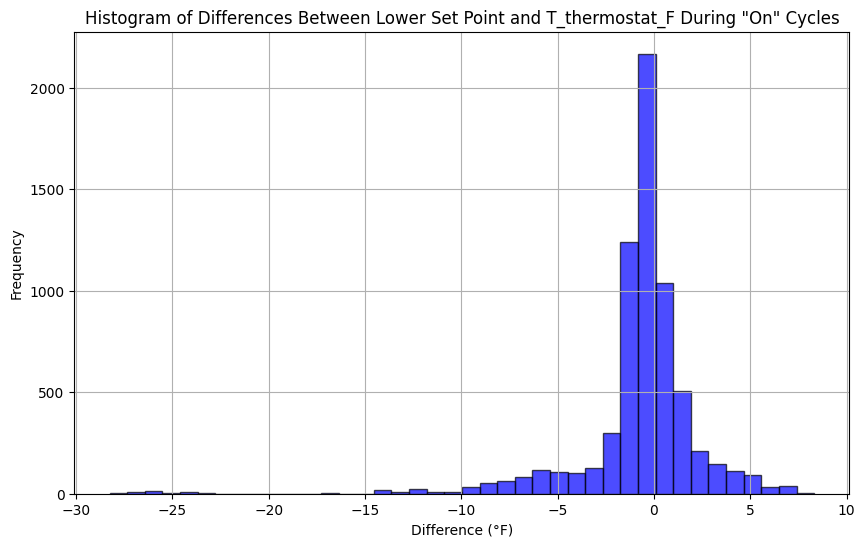

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/JadenFaste/WCECPlotly/main/Test%20data.csv'  
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the lower set point
data['Lower_Set_Point'] = data['T_HeatSetpoint_F'] - 0.5

# Filter data to include only periods when Controller_Water_Heating_Mode is on
on_cycles_data = data[data['Controller_Water_Heating_Mode'] == 1]

# Calculate the differences between the lower set point and T_thermostat_F
on_cycles_data['Difference'] = on_cycles_data['Lower_Set_Point'] - on_cycles_data['T_Thermostat_F']

# Plot the histogram of the differences
plt.figure(figsize=(10, 6))
plt.hist(on_cycles_data['Difference'], bins=40, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Differences Between Lower Set Point and T_thermostat_F During "On" Cycles')
plt.xlabel('Difference (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
